# Getting some actual qualitative shim performance data...
maybe i should fix the git issues before i do this tho....

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '..'))
import shimTool.dicomUtils as dicomUtils
import pydicom
print(os.getcwd())
print(os.listdir(os.path.join(os.getcwd(), '../..', 'data')))

/home/heartvista/Documents/robert/ge3t_shim_tool/src/experiments
['52560', '52668', '52716', '52496', '52507', '52514', '52482', '52730', '52679', '52732', '52555', '52509', '52746', '52665', '52645', '52723', '52548', '52536', '52517', '52745', '52682', '52739', '52666', '52515', '52712', '52670', '52628', '52542', '52689', '52713', '52667', '52480', '52740', '52576', '52541', '52660', '52625', '52703', '52736', '52498', '52647', '52674', '52649', '52656', '52700', '52707', '52562', '52599', '52643', '52694', '52499', '52584', '52563', '52569', '52568', '52662', '52741', '52686', '52728', '52747', '52512', '52731', '52639', '52676', '52678', '52726', '52497', '52692', '52737', '52727', '52675', '52594', '52510', '52636', '52671', '52537', '52511', '52481', '52571', '52520', '52705', '52725', '52681']


In [2]:
def listScans(dataDir, examName):
    examDir = os.path.join(dataDir, examName)
    for i, scanDir in enumerate(dicomUtils.listSubDirs(examDir)):
        dcm = pydicom.dcmread(dicomUtils.listDicomFiles(scanDir)[0])
        print(f"scan {scanDir[-6:]}, index {i}, (te, name){dicomUtils.extractMetadata(dcm)}")
    return examDir

def showBeforeAfterImages(scans, filename, titles=None):
    order = ['Before', 'After']
    for i, beforeafter in enumerate(scans):
        fig, ax = plt.subplots(1,2, figsize=(10,5))
        for j, scan in enumerate(beforeafter):
            b = dicomUtils.listDicomFiles(scan)[0]
            dcm = pydicom.dcmread(b)
            examTitle = dicomUtils.extractMetadata(dcm)[1]
            ax[j].imshow(dcm.pixel_array, cmap='gray')
            if titles is not None:
                if titles[i]:
                    ax[j].set_title(f"{titles[i]} | {order[j]} Shimming")
            else:
                ax[j].set_title(f"{examTitle} | {order[j]} Shimming")
            ax[j].set_axis_off()
        plt.show()
        if not os.path.exists('results'):
            os.makedirs('results')
        plt.savefig(os.path.join('results', filename + examTitle + '.png'))


# Attempt 1: No Shim Loops, but with the sphere phantom and the loops around it.

### Show the shim tool performance, and exam number

<img src='data/shimPerformance1.png' alt='shimPerformance1' style='width: 90%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [6]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52727'
examDir = listScans(dataDir, examName)

scan s31143, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31144, index 1, (te, name)('1.624', 'Fiesta')
scan s31145, index 2, (te, name)('0.52', 'Calibration')
scan s31146, index 3, (te, name)('1.624', 'Fiesta')
scan s31147, index 4, (te, name)('23.9', 'Gradient Echo EPI')
scan s31148, index 5, (te, name)('54.9', 'Gradient Echo EPI')
scan s31149, index 6, (te, name)('150.2', 'Gradient Echo EPI')
scan s31150, index 7, (te, name)('150.2', 'Gradient Echo EPI')
scan s31151, index 8, (te, name)('4.604', 'nd')
scan s31152, index 9, (te, name)('1.104', 'st')
scan s31153, index 10, (te, name)('4.604', 'nd')
scan s31154, index 11, (te, name)('150.2', 'Gradient Echo EPI')
scan s31155, index 12, (te, name)('1.104', 'st')
scan s31156, index 13, (te, name)('4.604', 'nd')
scan s31157, index 14, (te, name)('1.104', 'st')
scan s31158, index 15, (te, name)('4.604', 'nd')
scan s31159, index 16, (te, name)('1.104', 'st')
scan s31160, index 17, (te, name)('4.604', 'nd')
scan s31161, index 18, 

In [7]:
scanDirs = dicomUtils.listSubDirs(examDir)
beforeFiesta = scanDirs[3]
beforeEPI = scanDirs[7]
afterFiesta = scanDirs[24]
afterEPI = scanDirs[23]
fiestas = [beforeFiesta, afterFiesta]
epis = [beforeEPI, afterEPI]
scans = [fiestas, epis]


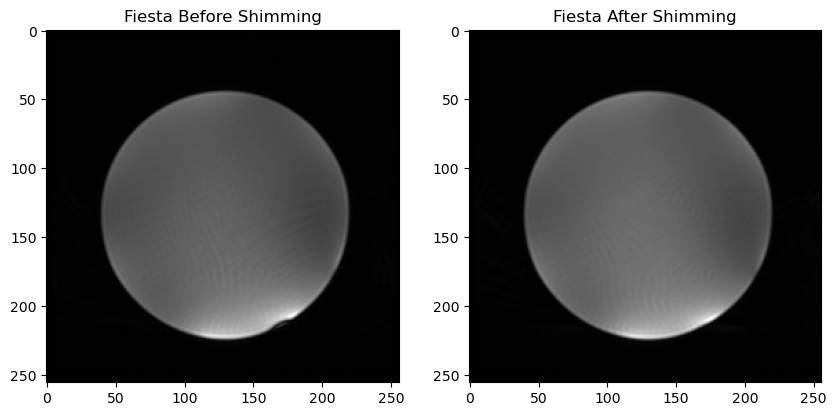

<Figure size 640x480 with 0 Axes>

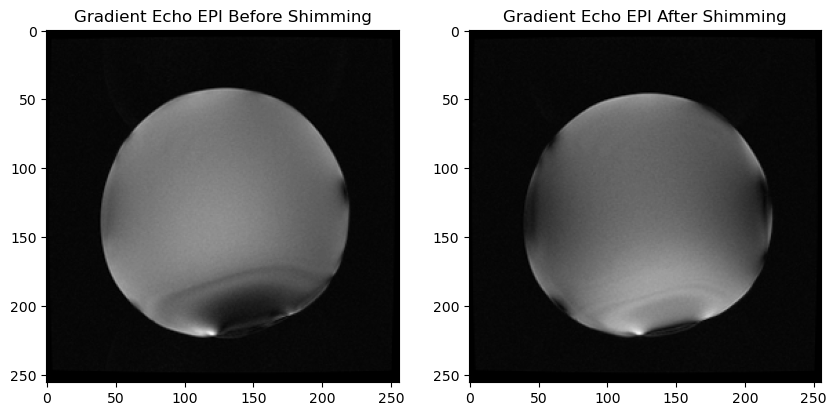

<Figure size 640x480 with 0 Axes>

In [8]:
showBeforeAfterImages(scans, '52727')

# Attempt 2: 2 Shim Loops, much better tuned shim loops now too...

### Show the shim tool performance, and exam number

<img src='data/shimPerformance2.png' alt='shimPerformance1' style='width: 150%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [14]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52731'
examDir = listScans(dataDir, examName)

scan s31263, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31264, index 1, (te, name)('28.8', 'Gradient Echo EPI')
scan s31265, index 2, (te, name)('1.388', 'Fiesta')
scan s31266, index 3, (te, name)('0.52', 'Calibration')
scan s31267, index 4, (te, name)('1.388', 'Fiesta')
scan s31268, index 5, (te, name)('28.8', 'Gradient Echo EPI')
scan s31269, index 6, (te, name)('1.104', 'st')
scan s31270, index 7, (te, name)('4.604', 'nd')
scan s31271, index 8, (te, name)('1.104', 'st')
scan s31272, index 9, (te, name)('4.604', 'nd')
scan s31273, index 10, (te, name)('1.104', 'st')
scan s31274, index 11, (te, name)('4.604', 'nd')
scan s31275, index 12, (te, name)('1.104', 'st')
scan s31276, index 13, (te, name)('4.604', 'nd')
scan s31277, index 14, (te, name)('1.104', 'st')
scan s31278, index 15, (te, name)('4.604', 'nd')
scan s31279, index 16, (te, name)('1.104', 'st')
scan s31280, index 17, (te, name)('4.604', 'nd')
scan s31281, index 18, (te, name)('1.104', 'st')
scan s31282, index 

In [11]:
scanDirs = dicomUtils.listSubDirs(examDir)
beforeFiesta = scanDirs[4]
beforeEPI = scanDirs[5]
afterFiesta = scanDirs[21]
afterEPI = scanDirs[20]
fiestas = [beforeFiesta, afterFiesta]
epis = [beforeEPI, afterEPI]
scans = [fiestas, epis]


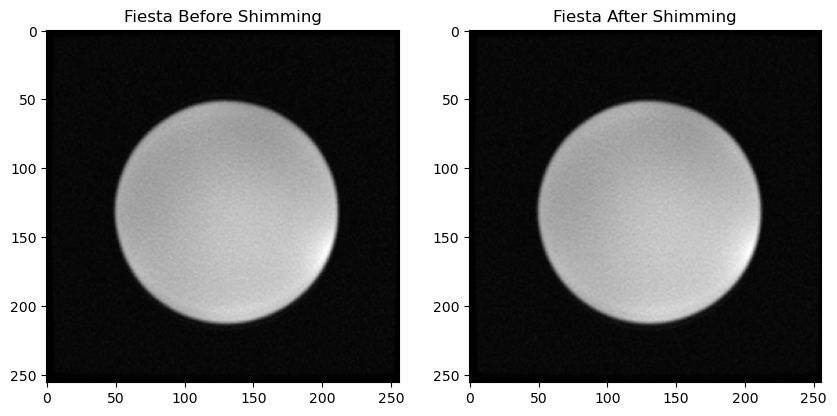

<Figure size 640x480 with 0 Axes>

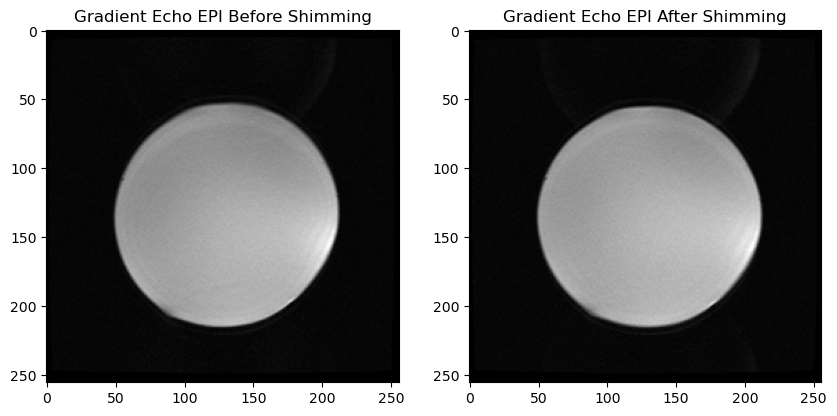

<Figure size 640x480 with 0 Axes>

In [15]:
showBeforeAfterImages(scans, '52731')

# Attempt 3: 2 Shim Loops, with induced off resonance

### Show the shim tool performance, and exam number

<img src='data/shimPerformance3.png' alt='shimPerformance1' style='width: 100%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [16]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52732'
examDir = listScans(dataDir, examName)

scan s31287, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31288, index 1, (te, name)('0.52', 'Calibration')
scan s31289, index 2, (te, name)('28.8', 'Gradient Echo EPI')
scan s31290, index 3, (te, name)('2.1', 'Fiesta')
scan s31291, index 4, (te, name)('1.104', 'st')
scan s31292, index 5, (te, name)('4.604', 'nd')
scan s31293, index 6, (te, name)('1.104', 'st')
scan s31294, index 7, (te, name)('4.604', 'nd')
scan s31295, index 8, (te, name)('1.104', 'st')
scan s31296, index 9, (te, name)('4.604', 'nd')
scan s31297, index 10, (te, name)('1.104', 'st')
scan s31298, index 11, (te, name)('4.604', 'nd')
scan s31299, index 12, (te, name)('1.104', 'st')
scan s31300, index 13, (te, name)('4.604', 'nd')
scan s31301, index 14, (te, name)('1.104', 'st')
scan s31302, index 15, (te, name)('4.604', 'nd')
scan s31303, index 16, (te, name)('1.104', 'st')
scan s31304, index 17, (te, name)('4.604', 'nd')
scan s31305, index 18, (te, name)('1.104', 'st')
scan s31306, index 19, (te, name)('4.60

In [19]:
scanDirs = dicomUtils.listSubDirs(examDir)
beforeFiesta = scanDirs[3]
beforeEPI = scanDirs[26]
afterFiesta = scanDirs[21]
afterEPI = scanDirs[27]
fiestas = [beforeFiesta, afterFiesta]
epis = [beforeEPI, afterEPI]
scans = [fiestas, epis]


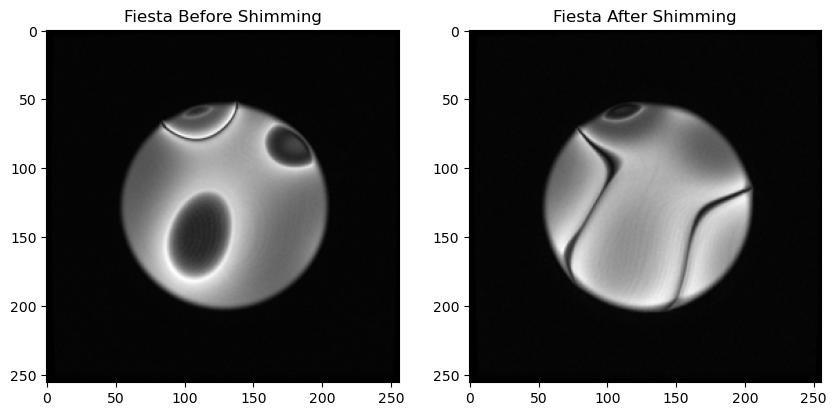

<Figure size 640x480 with 0 Axes>

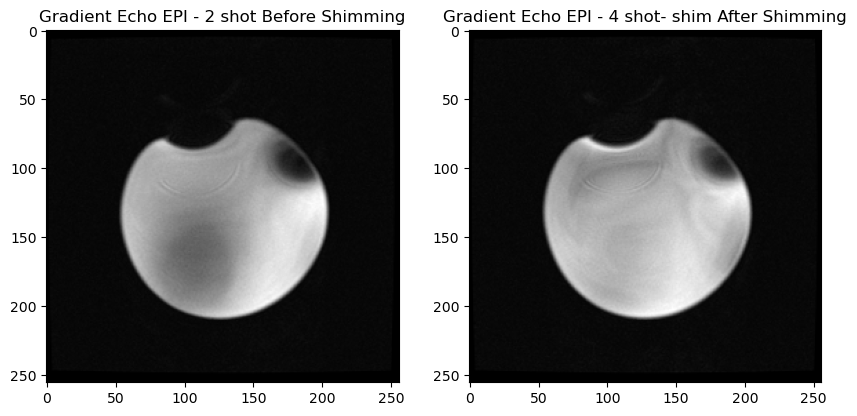

<Figure size 640x480 with 0 Axes>

In [20]:
showBeforeAfterImages(scans, '52731')

# Attempt 4: 8 supposedly retuned Shim Loops

### find the scan data and get the first initial EPI and Fiesta scans

In [14]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52737'
examDir = listScans(dataDir, examName)

scan s31405, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31406, index 1, (te, name)('13.7', 'B1Map')
scan s31407, index 2, (te, name)('1.448', 'Fiesta')
scan s31408, index 3, (te, name)('2.26', 'Fiesta')
scan s31409, index 4, (te, name)('2.26', 'Fiesta_256_24')
scan s31410, index 5, (te, name)('78.5', 'Gradient Echo EPI')
scan s31411, index 6, (te, name)('78.5', 'GRE_EPI_2')
scan s31412, index 7, (te, name)('2.26', 'Fiesta_256_24')
scan s31413, index 8, (te, name)('3.028', 'Fiesta_256_24')
scan s31414, index 9, (te, name)('78.5', 'GRE_EPI_preShim')
scan s31415, index 10, (te, name)('0.52', 'Calibration')
scan s31416, index 11, (te, name)('150.2', 'GRE_EPI_preShim-test')
scan s31417, index 12, (te, name)('150.2', 'GRE_EPI_2shot_preShim')
scan s31418, index 13, (te, name)('3.028', 'Fiesta_384_preShim')
scan s31419, index 14, (te, name)('1.104', 'st')
scan s31420, index 15, (te, name)('4.604', 'nd')
scan s31421, index 16, (te, name)('3.028', 'Fiesta_384_preShim')
scan s31422,

In [15]:
scanDirs = dicomUtils.listSubDirs(examDir)
beforeFiesta = scanDirs[48]
beforeEPI = scanDirs[47]
afterFiesta = scanDirs[49]
afterEPI = scanDirs[50]
fiestas = [beforeFiesta, afterFiesta]
epis = [beforeEPI, afterEPI]
scans = [fiestas, epis]


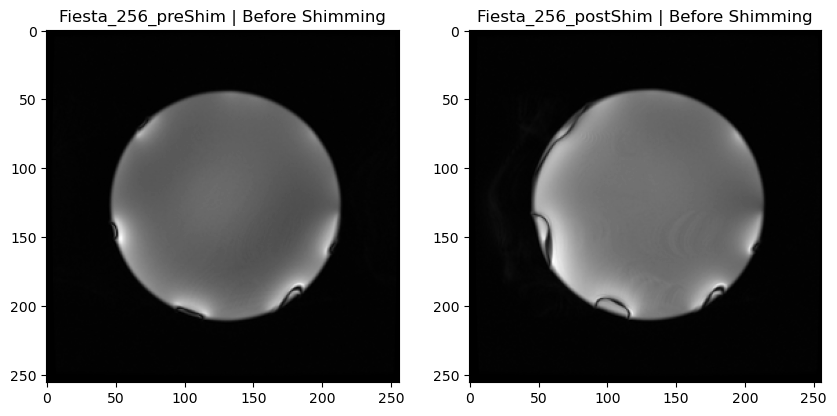

<Figure size 640x480 with 0 Axes>

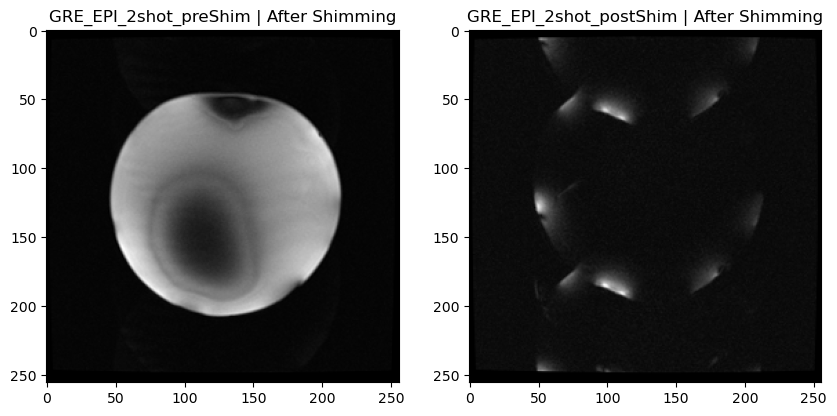

<Figure size 640x480 with 0 Axes>

In [16]:
showBeforeAfterImages(scans, '52731')

# Attempt 5: 8 small boards now. still pretty bad b1 map tho....

### Show the shim tool performance, and exam number

<img src='data/shimPerformance5.png' alt='shimPerformance5' style='width: 100%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [23]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52740'
examDir = listScans(dataDir, examName)

scan s31497, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31498, index 1, (te, name)('0.52', 'Calibration')
scan s31499, index 2, (te, name)('1.388', 'Fiesta')
scan s31500, index 3, (te, name)('28.8', 'Gradient Echo EPI')
scan s31501, index 4, (te, name)('1.104', 'st')
scan s31502, index 5, (te, name)('4.604', 'nd')
scan s31503, index 6, (te, name)('1.104', 'st')
scan s31504, index 7, (te, name)('4.604', 'nd')
scan s31505, index 8, (te, name)('1.104', 'st')
scan s31506, index 9, (te, name)('4.604', 'nd')
scan s31507, index 10, (te, name)('1.104', 'st')
scan s31508, index 11, (te, name)('4.604', 'nd')
scan s31509, index 12, (te, name)('1.104', 'st')
scan s31510, index 13, (te, name)('4.604', 'nd')
scan s31511, index 14, (te, name)('1.104', 'st')
scan s31512, index 15, (te, name)('4.604', 'nd')
scan s31513, index 16, (te, name)('1.104', 'st')
scan s31514, index 17, (te, name)('4.604', 'nd')
scan s31515, index 18, (te, name)('1.104', 'st')
scan s31516, index 19, (te, name)('4.

In [26]:
scanDirs = dicomUtils.listSubDirs(examDir)

fiesta_te_5_3 = [scanDirs[2], scanDirs[31]]
epi_1 = [scanDirs[3], scanDirs[30]]
fiesta_te_3_9 = [scanDirs[32], scanDirs[34]]
fiesta_te_4_6 = [scanDirs[33], scanDirs[35]]
epi_2 = [scanDirs[36], scanDirs[37]]
scans = [fiesta_te_5_3, epi_1, fiesta_te_3_9, fiesta_te_4_6, epi_2]
titles = ['Fiesta TR 5.3', 'EPI 1 Shot', 'Fiesta TR 3.9', 'Fiesta TR 4.6', 'EPI 2 Shot']


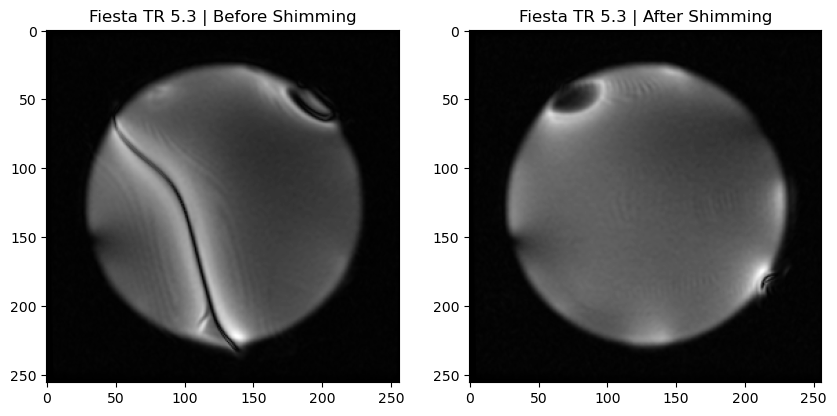

<Figure size 640x480 with 0 Axes>

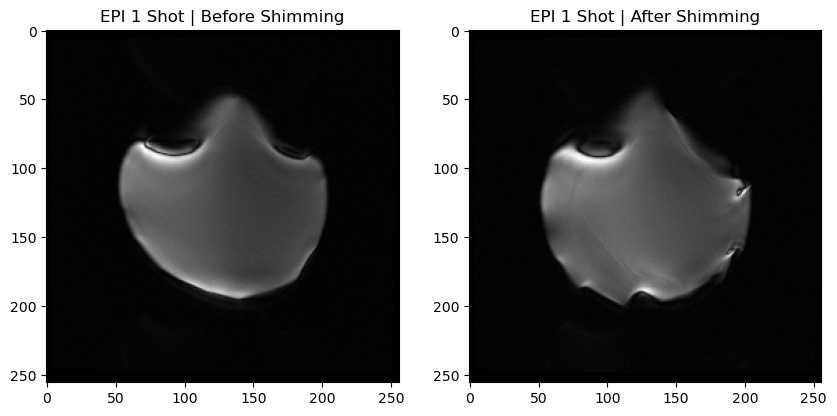

<Figure size 640x480 with 0 Axes>

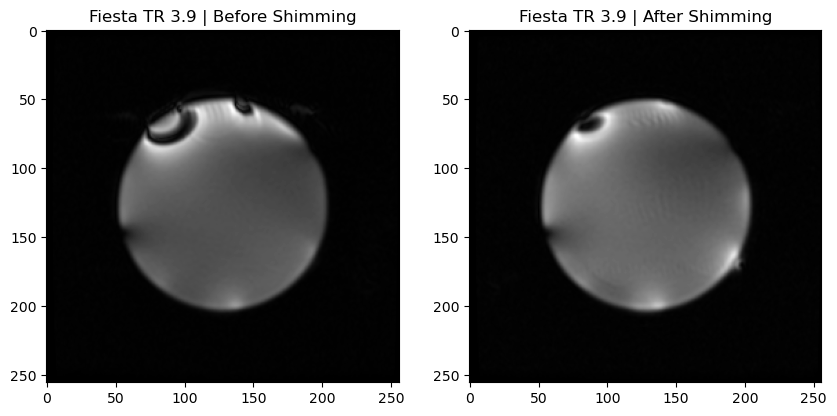

<Figure size 640x480 with 0 Axes>

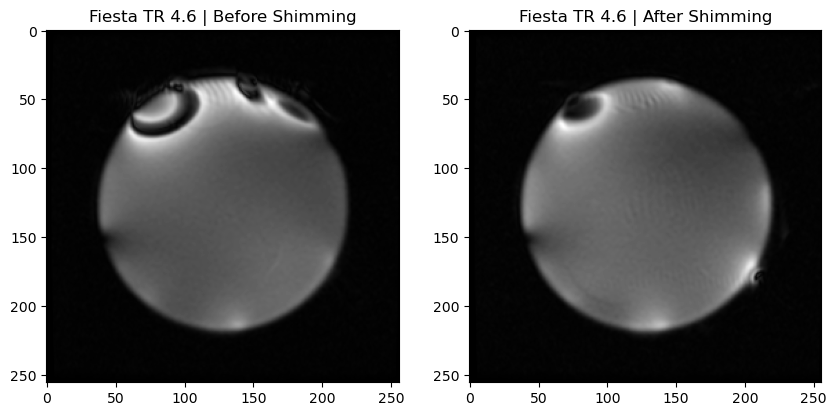

<Figure size 640x480 with 0 Axes>

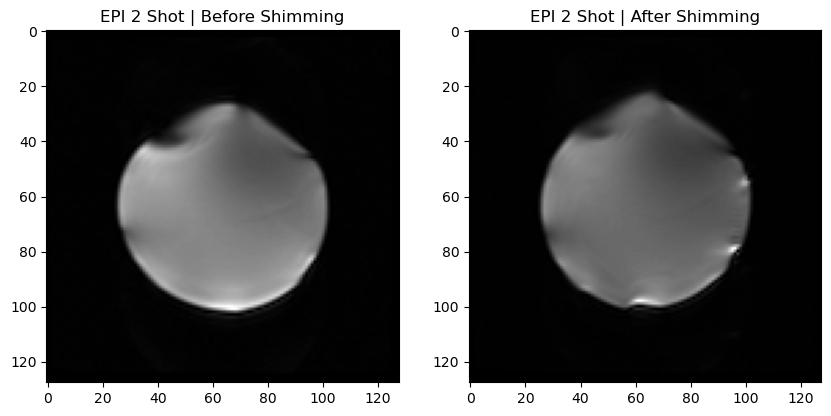

<Figure size 640x480 with 0 Axes>

In [27]:
showBeforeAfterImages(scans, '52731', titles)

# Attempt 6: 8 small boards, spaced out more...

### Show the shim tool performance, and exam number

<img src='data/shimPerformance6.png' alt='shimPerformance5' style='width: 100%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [4]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52741'
examDir = listScans(dataDir, examName)

scan s31540, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31541, index 1, (te, name)('13.7', 'B1Map')
scan s31542, index 2, (te, name)('0.52', 'Calibration')
scan s31543, index 3, (te, name)('1.624', 'Fiesta')
scan s31544, index 4, (te, name)('21.4', 'GRE EPI 1 shots')
scan s31545, index 5, (te, name)('15.2', 'GRE EPI 2 shots')
scan s31546, index 6, (te, name)('1.104', 'st')
scan s31547, index 7, (te, name)('4.604', 'nd')
scan s31548, index 8, (te, name)('1.104', 'st')
scan s31549, index 9, (te, name)('4.604', 'nd')
scan s31550, index 10, (te, name)('1.104', 'st')
scan s31551, index 11, (te, name)('4.604', 'nd')
scan s31552, index 12, (te, name)('1.104', 'st')
scan s31553, index 13, (te, name)('4.604', 'nd')
scan s31554, index 14, (te, name)('1.104', 'st')
scan s31555, index 15, (te, name)('4.604', 'nd')
scan s31556, index 16, (te, name)('1.104', 'st')
scan s31557, index 17, (te, name)('4.604', 'nd')
scan s31558, index 18, (te, name)('1.104', 'st')
scan s31559, index 19, (t

In [7]:
scanDirs = dicomUtils.listSubDirs(examDir)

fiesta_te_5_1 = [scanDirs[3], scanDirs[32]]
epi_1 = [scanDirs[4], scanDirs[33]]
epi_2 = [scanDirs[5], scanDirs[34]]
scans = [fiesta_te_5_1, epi_1, epi_2]
titles = ['Fiesta TR 5.1', 'EPI 1 Shots', 'EPI 2 Shots']


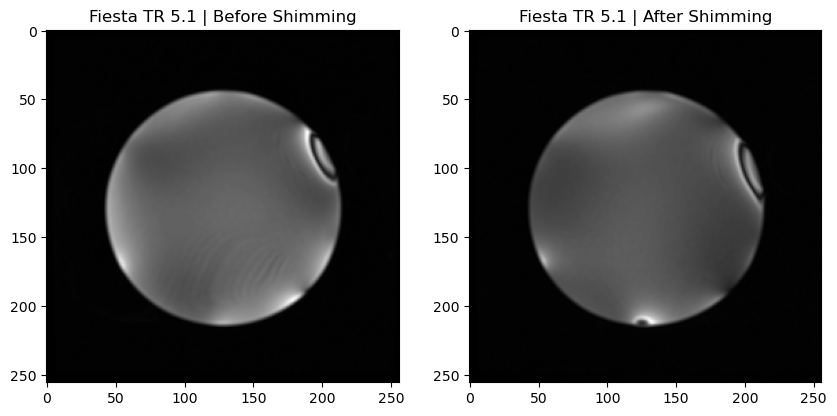

<Figure size 640x480 with 0 Axes>

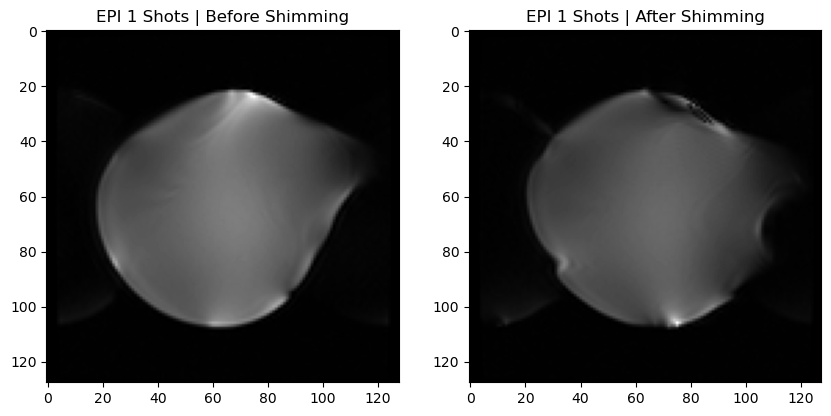

<Figure size 640x480 with 0 Axes>

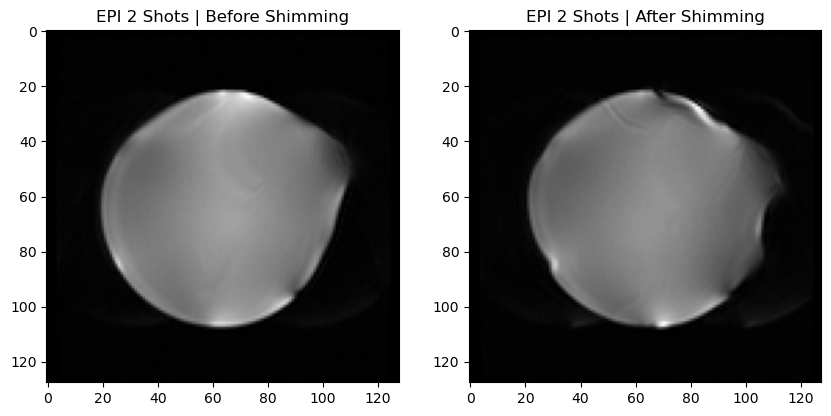

<Figure size 640x480 with 0 Axes>

In [8]:
showBeforeAfterImages(scans, '52731', titles)

# Attempt 7: 8 small boards with extra blocking circuit

### Show the shim tool performance, and exam number

<img src='data/shimPerformance7.png' alt='shimPerformance5' style='width: 100%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [19]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52746'
examDir = listScans(dataDir, examName)

scan s31686, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31687, index 1, (te, name)('13.7', 'B1Map')
scan s31688, index 2, (te, name)('13.7', 'B1Map')
scan s31689, index 3, (te, name)('13.7', 'B1Map_NO_WATERBOTTLE')
scan s31690, index 4, (te, name)('13.7', 'B1Map_NO_WATERBOTTLE')
scan s31691, index 5, (te, name)('0.52', 'Calibration')
scan s31692, index 6, (te, name)('1.632', 'Fiesta')
scan s31693, index 7, (te, name)('2.588', 'Fiesta')
scan s31694, index 8, (te, name)('57.2', 'Gradient Echo EPI')
scan s31695, index 9, (te, name)('31.8', 'Gradient Echo EPI 2 SHOT')
scan s31696, index 10, (te, name)('2.54', 'Fiesta')
scan s31697, index 11, (te, name)('1.104', 'st')
scan s31698, index 12, (te, name)('2.516', 'Fiesta')
scan s31699, index 13, (te, name)('1.104', 'st')
scan s31700, index 14, (te, name)('4.604', 'nd')
scan s31701, index 15, (te, name)('1.104', 'st')
scan s31702, index 16, (te, name)('4.604', 'nd')
scan s31703, index 17, (te, name)('1.104', 'st')
scan s31704, ind

In [20]:
scanDirs = dicomUtils.listSubDirs(examDir)

fiesta_te_8_3 = [scanDirs[10], scanDirs[41]]
fiesta_te_8_3_2 = [scanDirs[12], scanDirs[41]]
epi_1 = [scanDirs[8], scanDirs[42]]
epi_2 = [scanDirs[9], scanDirs[43]]
scans = [fiesta_te_8_3, fiesta_te_8_3_2, epi_1, epi_2]
titles = ['Fiesta TR 8.3', 'Fiesta TR 8.3', 'EPI 1 Shots', 'EPI 2 Shots']


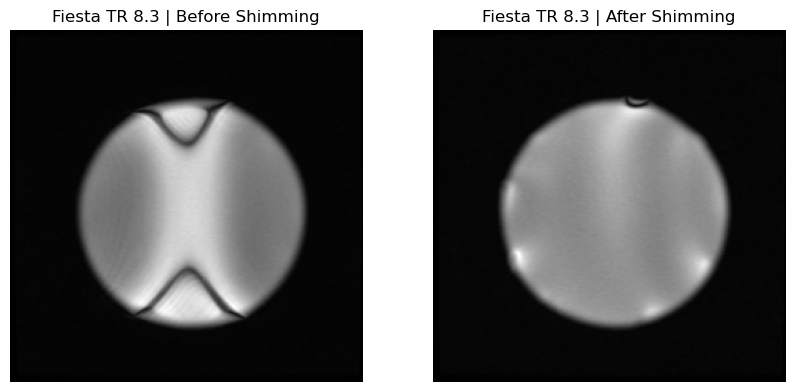

<Figure size 640x480 with 0 Axes>

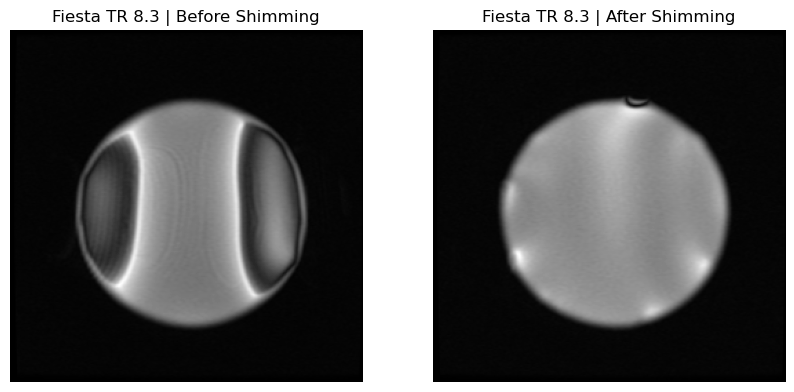

<Figure size 640x480 with 0 Axes>

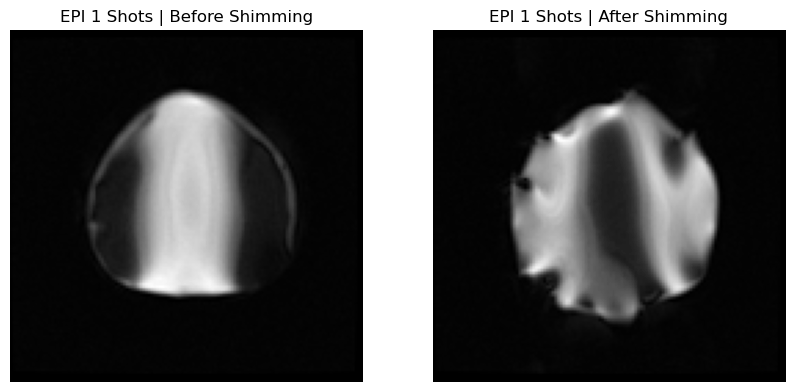

<Figure size 640x480 with 0 Axes>

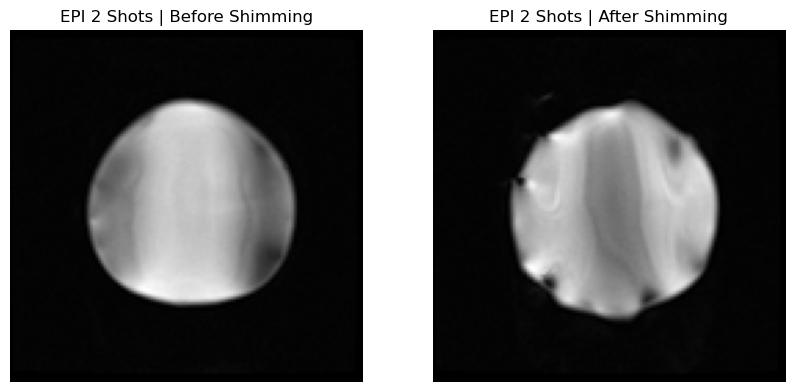

<Figure size 640x480 with 0 Axes>

In [21]:
showBeforeAfterImages(scans, '52746', titles)

# Attempt 8: 8 double blocking circuits, with padding between them and phantom

### Show the shim tool performance, and exam number

<img src='data/shimPerformance8_1.png' alt='shimPerformance5' style='width: 100%;'>

### find the scan data and get the first initial EPI and Fiesta scans

In [3]:
dataDir = os.path.join(os.getcwd(), '../..', 'data')
examName = '52747'
examDir = listScans(dataDir, examName)

scan s31740, index 0, (te, name)('82.457', '3-Plane Localizer')
scan s31741, index 1, (te, name)('13.7', 'B1Map')
scan s31742, index 2, (te, name)('0.52', 'Calibration')
scan s31743, index 3, (te, name)('150.2', 'GRE EPI 1 shots')
scan s31744, index 4, (te, name)('78.5', 'GRE EPI 2 shots')
scan s31745, index 5, (te, name)('1.628', 'Fiesta')
scan s31746, index 6, (te, name)('2.276', 'Fiesta')
scan s31747, index 7, (te, name)('1.104', 'st')
scan s31748, index 8, (te, name)('2.276', 'Fiesta')
scan s31749, index 9, (te, name)('1.104', 'st')
scan s31750, index 10, (te, name)('4.604', 'nd')
scan s31751, index 11, (te, name)('1.104', 'st')
scan s31752, index 12, (te, name)('4.604', 'nd')
scan s31753, index 13, (te, name)('1.104', 'st')
scan s31754, index 14, (te, name)('4.604', 'nd')
scan s31755, index 15, (te, name)('1.104', 'st')
scan s31756, index 16, (te, name)('4.604', 'nd')
scan s31757, index 17, (te, name)('1.104', 'st')
scan s31758, index 18, (te, name)('4.604', 'nd')
scan s31759, ind

In [4]:
scanDirs = dicomUtils.listSubDirs(examDir)

fiesta_te_6_7 = [scanDirs[8], scanDirs[39]]
epi_1 = [scanDirs[3], scanDirs[37]]
epi_2 = [scanDirs[4], scanDirs[38]]
epi_4 = [scanDirs[40], scanDirs[41]]
epi_4_wide = [scanDirs[42], scanDirs[43]]
epi_4_256 = [scanDirs[44], scanDirs[45]]
fiesta_vol = [scanDirs[54], scanDirs[55]]
epi_4_vol = [scanDirs[56], scanDirs[57]]
scans = [fiesta_te_6_7, epi_1, epi_2, epi_4, epi_4_wide, epi_4_256, fiesta_vol, epi_4_vol]
titles = ['Fiesta TR 6.7', 'EPI 1 Shots', 'EPI 2 Shots', 'EPI 4 Shots', 'EPI 4 Shots Wide', 'EPI 4 Shots 256', 'Fiesta Vol Shimmed', 'EPI 4 Shots Vol Shimmed']


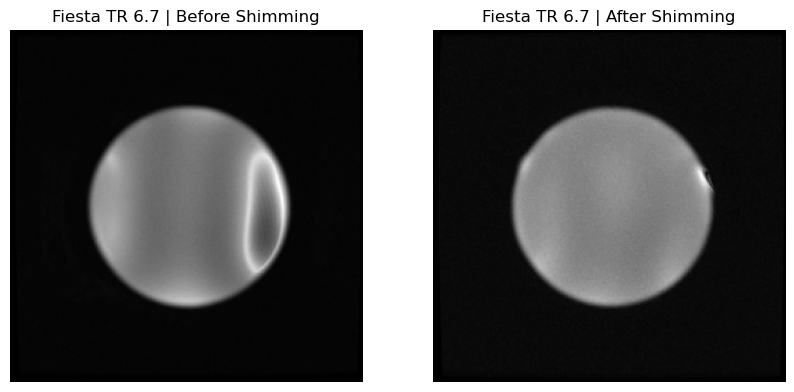

<Figure size 640x480 with 0 Axes>

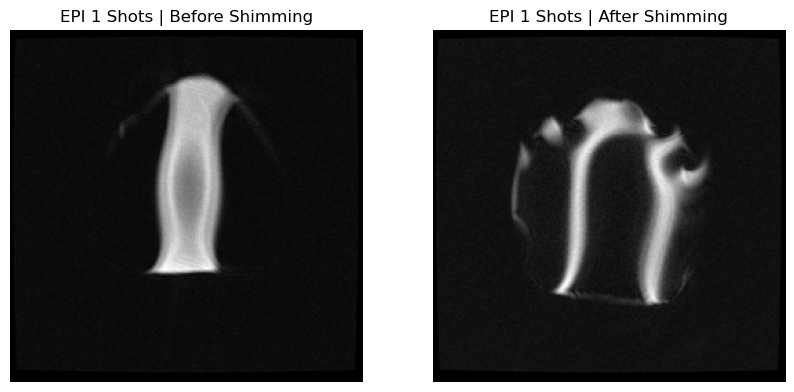

<Figure size 640x480 with 0 Axes>

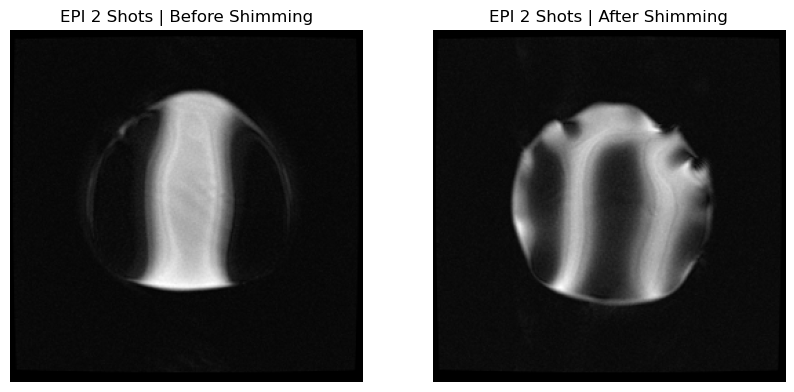

<Figure size 640x480 with 0 Axes>

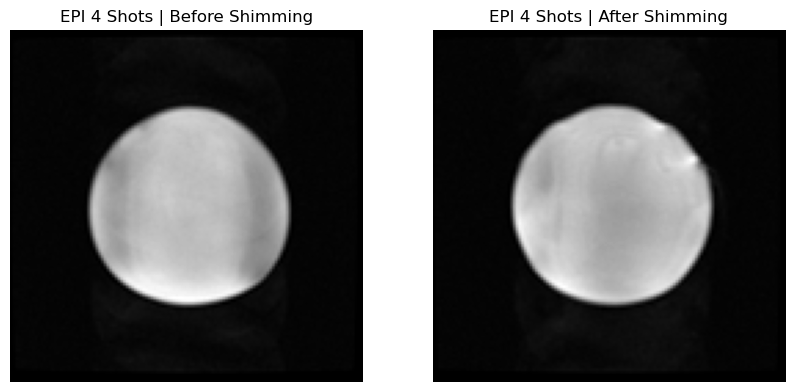

<Figure size 640x480 with 0 Axes>

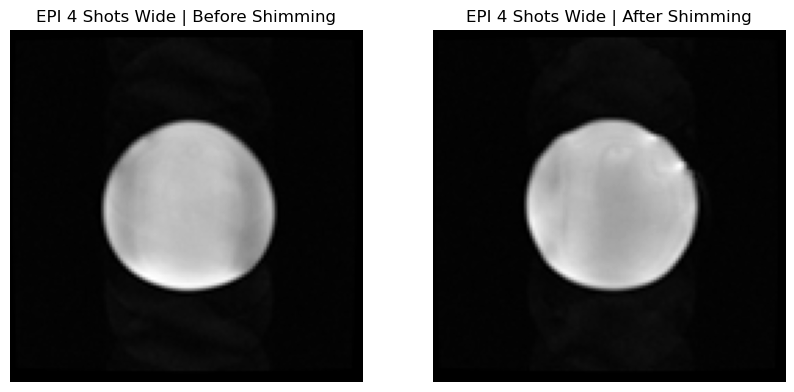

<Figure size 640x480 with 0 Axes>

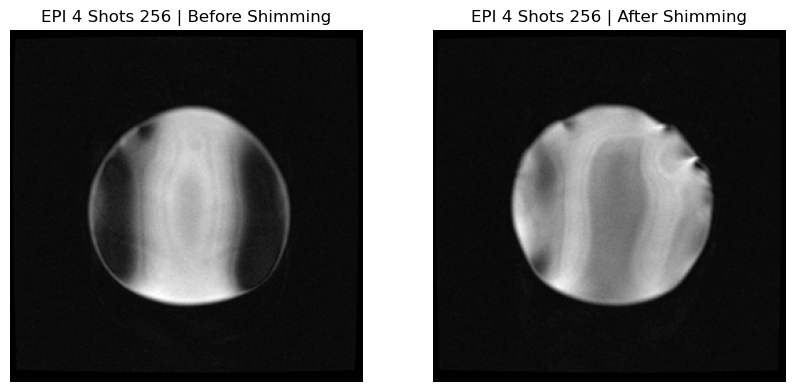

<Figure size 640x480 with 0 Axes>

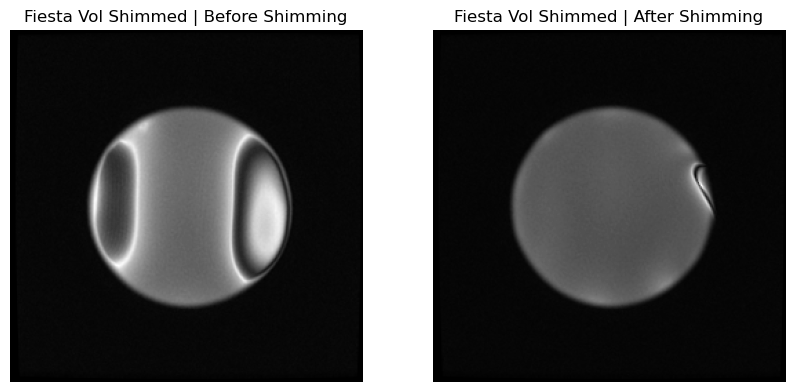

<Figure size 640x480 with 0 Axes>

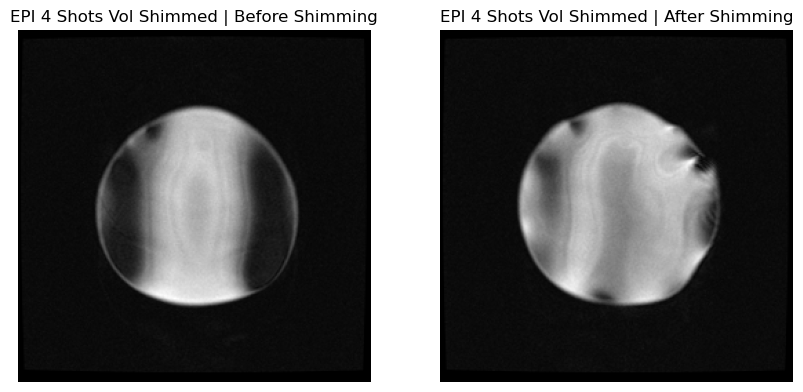

<Figure size 640x480 with 0 Axes>

In [5]:
showBeforeAfterImages(scans, '52731', titles)

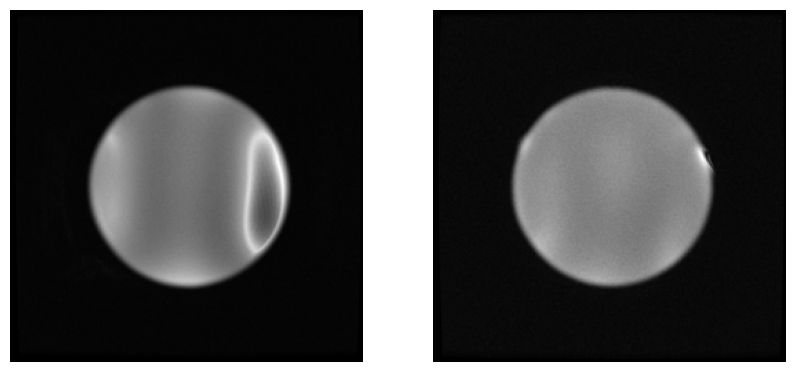

<Figure size 640x480 with 0 Axes>

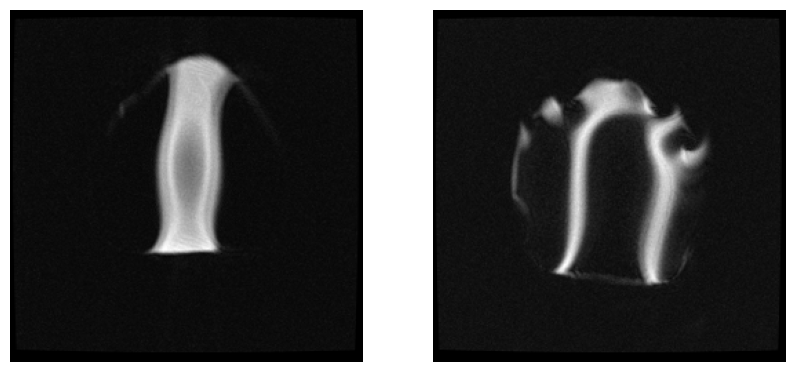

<Figure size 640x480 with 0 Axes>

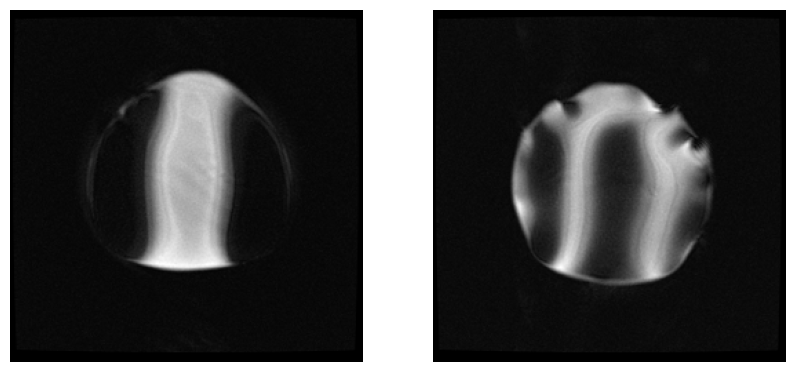

<Figure size 640x480 with 0 Axes>

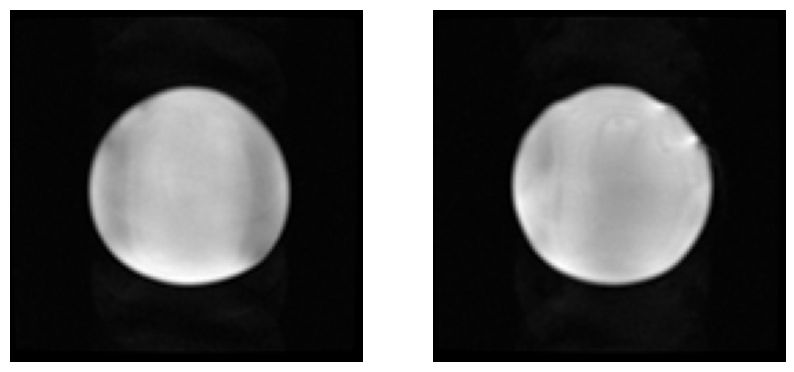

<Figure size 640x480 with 0 Axes>

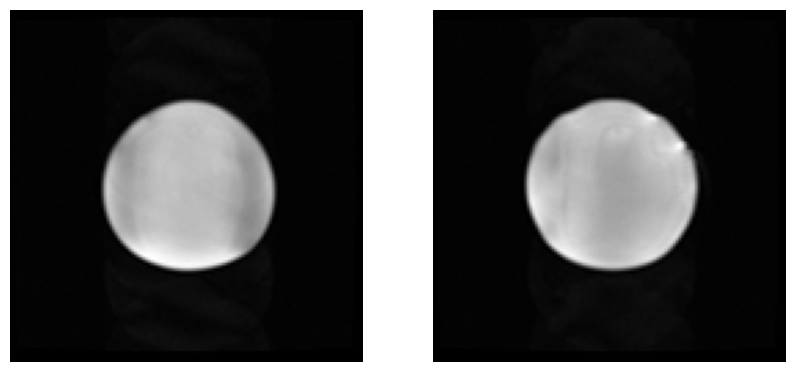

<Figure size 640x480 with 0 Axes>

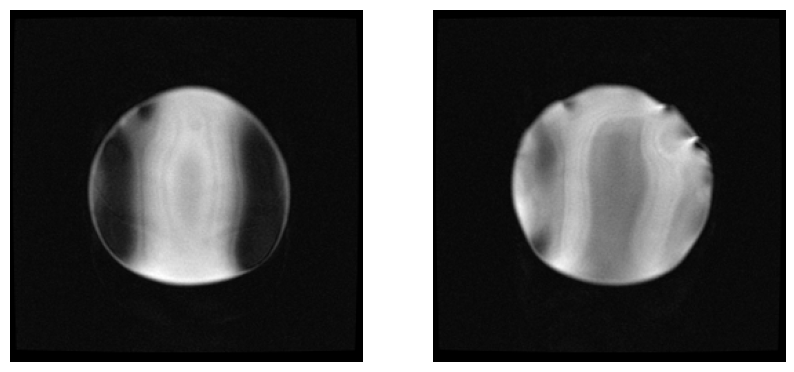

<Figure size 640x480 with 0 Axes>

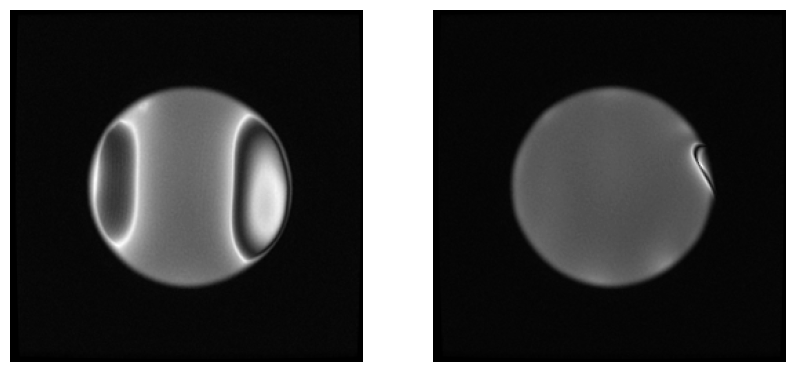

<Figure size 640x480 with 0 Axes>

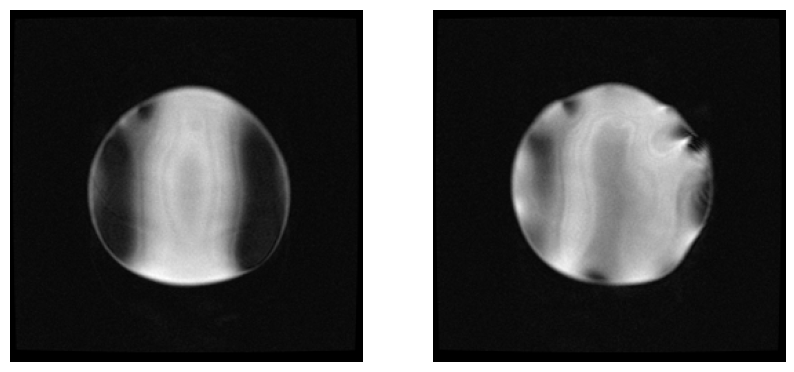

<Figure size 640x480 with 0 Axes>

In [26]:
showBeforeAfterImages(scans, '52746', ["" for _ in titles])

